In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [19]:
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)

In [20]:
df

array([[ -1.25946447,  21.2748827 ],
       [  7.95761091, -20.76870639],
       [  6.99191711,  -9.95597804],
       ...,
       [ 10.80129103,  -6.96025502],
       [ -4.87211675,  12.42396204],
       [ -0.344382  ,   6.36555157]])

In [13]:
df[:,0]

array([-1.25946607,  7.95761098,  6.99192357, ..., 10.80128373,
       -4.87210046, -0.3443897 ])

<AxesSubplot:>

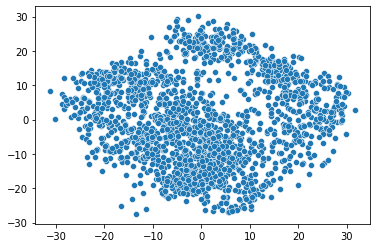

In [21]:
sns.scatterplot(data=df, x=df[:,0], y=df[:,1])

In [22]:
class k_means():
    def __init__(self, num_centroids, iterations):
        self.num_centroids = num_centroids
        self.iterations = iterations
        self.clusters = []
           
    def _get_centroids(self, iteration):
        if iteration == 0:
            mean = [5, 9]
            cov = [[2.5, 0.8], [0.8, 0.5]]
            self.centroids = np.random.multivariate_normal(mean, cov, self.num_centroids).T
            self.centroids = self.centroids.T
        else:
            columns = ['Iteration','Obs_num','Coor_1','Coor_2','Cluster_num','Cluster_dist']
            df_new_centroids = pd.DataFrame(self.clusters, columns = columns).groupby(by = ['Cluster_num','Iteration'])['Coor_1','Coor_2'].mean()
            #print(df_new_centroids)
            df_new_centroids.reset_index(inplace=True)
            self.centroids = np.array(df_new_centroids[df_new_centroids['Iteration'] == (iteration-1)][['Coor_1','Coor_2']])
           
        return self.centroids
    
    def do_magic(self,data):
        self.data = data
        for iteration in range(self.iterations):
            #print(iteration)
            centroids = self._get_centroids(iteration)
            distances = self._distance_calc(centroids)
            self.clusters = self._find_cluster(iteration, distances)
        
        return self.clusters
            #print(clusters)    
        
    def _distance_calc(self, centroids):
        d = {}
        for i in range(len(self.data)):
        
            d[i] = {}
            for centroid in range(len(centroids)):
                d[i][centroid] = {}
                d[i][centroid] = sum((self.data[i] - centroids[centroid])**2)**0.5
        return d

    def _find_cluster(self, iteration, dist):
    
        '''
        iteration - number of iteration 
        x - initial data 
        dist - dictionary with calculated distances between each point and suggessted clusters 
        '''

        # iterating over each data point (observation) and for each observation taking
        # the closest cluster for the iteration coordinates of the observation 
        
        for i in range(len(self.data)):
            # the closest cluster to the observation
            i_cluster = min(dist[i], key=dist[i].get)
            # distance of the observationb to the closest cluster 
            i_dist = min(dist[i].values())
            self.clusters.append([iteration, i, self.data[i][0], self.data[i][1], i_cluster, i_dist])
        
        return self.clusters

    #def loss(self, clusters):
    # TBD
            

In [33]:
model = k_means(num_centroids=10,iterations=5)

In [34]:
result = model.do_magic(df)

<ipython-input-22-2ba46d91421a>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new_centroids = pd.DataFrame(self.clusters, columns = columns).groupby(by = ['Cluster_num','Iteration'])['Coor_1','Coor_2'].mean()
<ipython-input-22-2ba46d91421a>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new_centroids = pd.DataFrame(self.clusters, columns = columns).groupby(by = ['Cluster_num','Iteration'])['Coor_1','Coor_2'].mean()
<ipython-input-22-2ba46d91421a>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new_centroids = pd.DataFrame(self.clusters, columns = columns).groupby(by = ['Cluster_num','Iteration'])['Coor_1','Coor_2'].mean()
<ipython-input-22-2ba46d91421a>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tup

In [35]:
result

[[0, 0, -1.2594644704700155, 21.274882701794084, 3, 13.016702439654315],
 [0, 1, 7.9576109074171715, -20.76870638685388, 6, 29.20256062521367],
 [0, 2, 6.991917113512003, -9.95597804289324, 6, 18.3785327035662],
 [0, 3, -15.906100553665949, 3.3324601142805323, 5, 18.283761282241016],
 [0, 4, 23.30685980119268, 4.269061924375255, 0, 17.597789294359842],
 [0, 5, -14.087082822854983, 7.914451049810047, 5, 15.794455378508932],
 [0, 6, 21.3634036512196, 5.288339993512249, 0, 15.43536794399028],
 [0, 7, -2.9526150404803557, -21.071650188891237, 5, 29.68960542564527],
 [0, 8, -5.255132998306269, 1.1833580190749404, 5, 9.918249828214973],
 [0, 9, -5.4802152485816915, 8.076337902562663, 5, 7.186123344087727],
 [0, 10, 11.215075518707787, 16.919864172736897, 0, 8.43283079026812],
 [0, 11, 3.009169518955363, -11.994801975896388, 6, 20.110694113173295],
 [0, 12, -2.4141826527354824, -4.851663853918997, 5, 13.7340943659148],
 [0, 13, -23.255615760146018, -1.9067554175516852, 5, 26.94703680947459],


In [36]:
columns = ['Iteration','Obs_num','Coor_1','Coor_2','Cluster_num','Cluster_dist']
cluster_results = pd.DataFrame(result, columns = columns)

<AxesSubplot:xlabel='Coor_1', ylabel='Coor_2'>

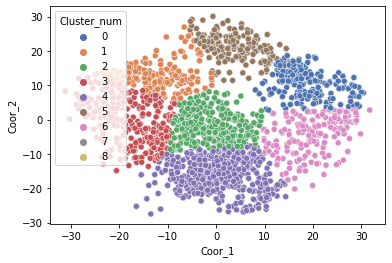

In [37]:
sns.scatterplot(data=cluster_results, x="Coor_1", y="Coor_2", hue="Cluster_num",palette="deep")

In [38]:
# comluting loss with Iteration steps and Clusters
cluster_results.groupby(by = ['Iteration','Cluster_num'])['Cluster_dist'].sum()

Iteration  Cluster_num
0          0               5711.223567
           3                955.967622
           4                 16.455233
           5              18043.511512
           6               6590.798974
           7                131.661131
           8               1148.468385
1          0               1633.551072
           1                875.411931
           2                935.048439
           3               6025.750337
           4               3652.157156
           5                472.155884
           6               1007.466079
2          0               1256.376137
           1               1065.266940
           2               1360.063071
           3               4175.121831
           4               3378.254874
           5                652.383859
           6               1088.421428
3          0               1226.400099
           1               1291.927795
           2               1559.553779
           3               3194.563911
  

In [39]:
# comluting loss in terms of  Iteration steps
cluster_results.groupby(by = ['Iteration'])['Cluster_dist'].sum()

Iteration
0    32598.086423
1    14601.540899
2    12975.888139
3    12490.959742
4    12070.314500
Name: Cluster_dist, dtype: float64